# Getting Started

`scopesim.source.Source` objects are composed of a spatial description and a spectral one. Spatial description can be `astropy.table.Table` objects for point sources or an `astropy.fits.ImageHDU` for extended sources. Spectral description is provided as `synphot.SourceSpectrum` or compatible objects. Spectral datacubes can also be accepted

## Creation of a `Source`

The creation of `scopesim.source.Source` objects might require quite a bit of interaction from the user. For example


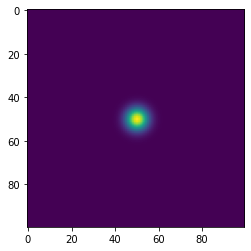

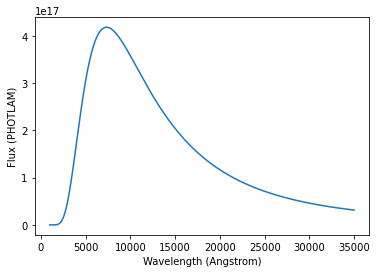

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import synphot
from scopesim import Source

# creation of a image with a central source defined by a 2D gaussian
x, y = np.meshgrid(np.arange(100), np.arange(100))
img = np.exp(-1 * ( ( (x - 50) / 5)**2 + ( (y - 50) / 5)**2 ) )

# Fits headers of the image. Yes it needs a WCS
hdr = fits.Header(dict(NAXIS=2,
                       NAXIS1=img.shape[0]+1,
                       NAXIS2=img.shape[1]+1,
                       CRPIX1=img.shape[0] / 2,
                       CRPIX2=img.shape[1] / 2,
                       CRVAL1=0,
                       CRVAL2=0,
                       CDELT1=0.2/3600,
                       CDELT2=0.2/3600,
                       CUNIT1="DEG",
                       CUNIT2="DEG",
                       CTYPE1='RA---TAN',
                       CTYPE2='DEC--TAN'))

# Creating an ImageHDU object
hdu = fits.ImageHDU(data=img, header=hdr)

# Creating of a black body spectrum
wave = np.arange(1000, 35000, 10 )
bb = synphot.models.BlackBody1D(temperature=5000)
sp = synphot.SourceSpectrum(synphot.Empirical1D, points=wave, lookup_table=bb(wave))

# Source creation
src1 = Source(image_hdu=hdu, spectra=sp)

plt.imshow(src1.fields[0].data)
src1.spectra[0].plot()

The attributes `.fields` and `.spectra` contain the spatial and spectral description of the sources respectively. Datacubes are stored in the `cube` attribute

These attributes are actually lists of objects which allow to store several sources to be used in one simulation. 

## Combining sources

For example, let's create now a simple point source and combine it with the previous one

In [2]:
lam = np.arange(1000, 10000, 1)
flux = np.ones(lam.shape)

src2 = Source(x=[0], y=[0], lam=lam, spectra=flux, weight=[1], ref=[0])

src = src1 + src2

# printing information about the combined source
print(src)

[0]: ImageHDU with size (100, 100), referencing spectrum 0
[1]: Table with 1 rows, referencing spectra {1} 



More details can be found in the respective fields

In [3]:
print(src.spectra)

print(src.fields)

[<synphot.spectrum.SourceSpectrum object at 0x7f93b056dd60>, <synphot.spectrum.SourceSpectrum object at 0x7f93d03a1430>]
[<astropy.io.fits.hdu.image.ImageHDU object at 0x7f93b0676b80>, <Table length=1>
   x       y     ref  weight
 arcsec  arcsec             
float64 float64 int64 int64 
------- ------- ----- ------
    0.0     0.0     1      1]


## ScopeSim_Templates

The idea of `ScopeSim_Templates` is exactly to aid the creation of standard sources to used in the simulator `ScopeSim`.

Currently the package contain sources to work with stellar and extragalactic objects, as well as general function for other purposes. 

The following example combines galaxy and a central source simulating an AGN

In [4]:
from scopesim_templates.extragalactic import galaxy
from scopesim_templates.misc import point_source

gal = galaxy(sed="kc96/s0", amplitude=15, filter_curve="g")  # This will create a galaxy with an S0 SED from the Kinney-Calzetti library (see speXtra)
agn = point_source(sed="agn/qso", amplitude=13, filter_curve="g") # and this an AGN

source = gal + agn

print(repr(source))

[0]: ImageHDU with size (150, 150), referencing spectrum 0
[1]: Table with 1 rows, referencing spectra {1} 

